In [0]:
#This scrap is by Sara Syakirah Hashim A163180
!pip install BeautifulSoup4
!pip install requests
!pip install pandas

from bs4 import BeautifulSoup
import requests
import pandas as pd

In [0]:
url= 'https://www.bookxcessonline.com/'
response = requests.get(url)
data= response.text
soup = BeautifulSoup(data,'html.parser')

In [0]:
npo_book = {}
book_no = 0
books = soup.find_all('div',{'class':'product-wrap'})

for book in books:
        book_url = 'https://www.bookxcessonline.com' + book.find('a').get('href')
        book_response = requests.get(book_url)
        book_data= book_response.text
        book_soup= BeautifulSoup(book_data,'html.parser')

        book_name= book_soup.find('h1',{'class':'product_name'}).text# Book Title
        book_promotion= book_soup.find('div',{'class':'sale_banner_product'}).text #Promotion Percentage
        book_sold_out= book_soup.find('span',{'class':'sold_out'}).text #Books Out-of-Stock

        book_was_price=0
        book_curr_price=0

        book_tags =book_soup.find('div',{'class':'tags_list'}).text #Categories
        book_tags=book_tags.split()
        
        book_tag=[]
        
        for i in range(1,len(book_tags)): #MAIN Categories
            if (book_tags[i]=='Children\'s' or book_tags[i]=='Book' or book_tags[i]=='Fiction' or book_tags[i]=='Non-Book' or book_tags[i]=='NEW ARRIVALS' or book_tags[i]=='Non-Fiction:'):
                if book_tags[i]=='Children\'s' or book_tags[i]=='Book':
                    book_tag.append('Children\'s Book')
                else:
                    book_tag.append(book_tags[i])
        
        link_tag=book.find('a')
        link="https://www.bookxcessonline.com" + str(link_tag.get('href'))

        if link_tag:
            try:
                response1 = requests.get(link)
                data1 = response1.text
                soup1 = BeautifulSoup(data1, 'html.parser')

                description_tag = soup1.find('div', {'class': 'description'})
                description = description_tag.text if description_tag else "N/A"

            except:
                description = "N/A"

        book_no += 1
        npo_book[book_no] = [book_name,book_promotion,book_sold_out,book_was_price,book_curr_price,book_tag[0],link,description]

print("Total Book count:", book_no)

npo_book_df = pd.DataFrame.from_dict(npo_book, orient='index', columns=['Name','Promotion','Sold_Out','Was_Price','Current_Price','Tag','Links','Description'])

#Fix the Prices
prices=soup.find_all('span',{'class','price'})
book_no=0
for price in prices:
    if book_no<len(npo_book_df):
        priceList=price.text.split()

        if len(priceList)==2:
            npo_book_df['Was_Price'].iloc[book_no]=priceList[0]
            npo_book_df['Current_Price'].iloc[book_no]=priceList[1]
            
            if priceList[1]=='Out-of-Stock': #if book out of stock- current price, not available
               npo_book_df['Current_Price'].iloc[book_no]=priceList[0]

        else: # If book has no promotion
            npo_book_df['Was_Price'].iloc[book_no]=priceList[0] # No before price-price doesn't change
            npo_book_df['Current_Price'].iloc[book_no]=priceList[0]
        book_no+=1 

npo_book_df   

Total Book count: 73


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Name,Promotion,Sold_Out,Was_Price,Current_Price,Tag,Links,Description
1,Charles Dickens: A Celebration of His Life and...,-71%,Out-of-Stock,RM118.00,RM118.00,Non-Fiction:,https://www.bookxcessonline.com/collections/ne...,\n Published in 2011 to mark the...
2,My Busy Books: Teenage Mutant Ninja Turtles,-71%,,RM87.00,RM24.90,Children's Book,https://www.bookxcessonline.com/collections/ne...,\n An engaging storybook and toy...
3,My Busy Books: Guarding of the Galaxy,-71%,,RM87.00,RM24.90,Children's Book,https://www.bookxcessonline.com/collections/ne...,\n An engaging storybook and toy...
4,My Busy Books: Frozen Fever,-71%,,RM87.00,RM24.90,Children's Book,https://www.bookxcessonline.com/collections/ne...,\n An engaging storybook and toy...
5,My Busy Books: My Little Pony the Movie,-71%,,RM87.00,RM24.90,Children's Book,https://www.bookxcessonline.com/collections/ne...,\n An engaging storybook and toy...
...,...,...,...,...,...,...,...,...
69,Great Expectations: Chiltern Edition,-71%,,RM175.00,RM49.90,Fiction,https://www.bookxcessonline.com/collections/fi...,"\n In Great Expectations, one of..."
70,The 13th Reality Series (Box Set),-66%,,RM148.00,RM49.90,Fiction,https://www.bookxcessonline.com/collections/fi...,What if every time you made a choice that had...
71,The Divergent Series Boxed Set (Books 1-3),-65%,,RM143.80,RM49.90,Fiction,https://www.bookxcessonline.com/collections/fi...,"No. 1 New York Times bestsellers DIVERGENT, I..."
72,J.K. Rowling's Wizarding World: Movie Magic - ...,-61%,,RM129.90,RM49.90,Children's Book,https://www.bookxcessonline.com/collections/fi...,Featuring all eight Harry Potter movies and t...


Total Book count: 73


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Name,Promotion,Sold_Out,Was_Price,Current_Price,Tag,Links,Description
1,Charles Dickens: A Celebration of His Life and...,-71%,Out-of-Stock,RM118.00,RM118.00,Non-Fiction:,https://www.bookxcessonline.com/collections/ne...,\n Published in 2011 to mark the...
2,My Busy Books: Teenage Mutant Ninja Turtles,-71%,,RM87.00,RM24.90,Children's Book,https://www.bookxcessonline.com/collections/ne...,\n An engaging storybook and toy...
3,My Busy Books: Guarding of the Galaxy,-71%,,RM87.00,RM24.90,Children's Book,https://www.bookxcessonline.com/collections/ne...,\n An engaging storybook and toy...
4,My Busy Books: Frozen Fever,-71%,,RM87.00,RM24.90,Children's Book,https://www.bookxcessonline.com/collections/ne...,\n An engaging storybook and toy...
5,My Busy Books: My Little Pony the Movie,-71%,,RM87.00,RM24.90,Children's Book,https://www.bookxcessonline.com/collections/ne...,\n An engaging storybook and toy...
...,...,...,...,...,...,...,...,...
69,Great Expectations: Chiltern Edition,-71%,,RM175.00,RM49.90,Fiction,https://www.bookxcessonline.com/collections/fi...,"\n In Great Expectations, one of..."
70,The 13th Reality Series (Box Set),-66%,,RM148.00,RM49.90,Fiction,https://www.bookxcessonline.com/collections/fi...,What if every time you made a choice that had...
71,The Divergent Series Boxed Set (Books 1-3),-65%,,RM143.80,RM49.90,Fiction,https://www.bookxcessonline.com/collections/fi...,"No. 1 New York Times bestsellers DIVERGENT, I..."
72,J.K. Rowling's Wizarding World: Movie Magic - ...,-61%,,RM129.90,RM49.90,Children's Book,https://www.bookxcessonline.com/collections/fi...,Featuring all eight Harry Potter movies and t...


# Cleaning DataFrame

In [0]:
# Get column names
column_names = npo_book_df.columns
print(column_names)
# Get column data types
npo_book_df.dtypes
# Also check if the column is unique
for i in column_names:
  print('{} is unique: {}'.format(i, npo_book_df[i].is_unique))

Index(['Name', 'Promotion', 'Sold_Out', 'Was_Price', 'Current_Price', 'Tag',
       'Links', 'Description'],
      dtype='object')
Name is unique: False
Promotion is unique: False
Sold_Out is unique: False
Was_Price is unique: False
Current_Price is unique: False
Tag is unique: False
Links is unique: True
Description is unique: False


In [0]:
# Check the index values
npo_book_df.index.values
# Check if a certain index exists
'foo' in npo_book_df.index.values
# If index does not exist
#npo_book_df.set_index('column_name_to_use', inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


False

In [0]:
#shows data type of columns in dataframe
dtypeCount =[npo_book_df.iloc[:,i].apply(type).value_counts() for i in range(npo_book_df.shape[1])]
dtypeCount

[<class 'str'>    73
 Name: Name, dtype: int64, <class 'str'>    73
 Name: Promotion, dtype: int64, <class 'str'>    73
 Name: Sold_Out, dtype: int64, <class 'str'>    73
 Name: Was_Price, dtype: int64, <class 'str'>    73
 Name: Current_Price, dtype: int64, <class 'str'>    73
 Name: Tag, dtype: int64, <class 'str'>    73
 Name: Links, dtype: int64, <class 'str'>    73
 Name: Description, dtype: int64]

In [0]:
data_df=npo_book_df.copy()

#resetting index
data_df=data_df.reset_index(drop=True)

#transorm to lower case
data_df['Name']=data_df['Name'].str.lower()
data_df['Links']=data_df['Links'].str.lower()
data_df['Description']=data_df['Description'].str.lower()
data_df['Tag']=data_df['Tag'].str.lower()

In [0]:
data_df

,Name,Promotion,Sold_Out,Was_Price,Current_Price,Tag,Links,Description
0,charles dickens: a celebration of his life and...,-71%,Out-of-Stock,RM118.00,RM118.00,non-fiction:,https://www.bookxcessonline.com/collections/ne...,\n published in 2011 to mark the...
1,my busy books: teenage mutant ninja turtles,-71%,,RM87.00,RM24.90,children's book,https://www.bookxcessonline.com/collections/ne...,\n an engaging storybook and toy...
2,my busy books: guarding of the galaxy,-71%,,RM87.00,RM24.90,children's book,https://www.bookxcessonline.com/collections/ne...,\n an engaging storybook and toy...
3,my busy books: frozen fever,-71%,,RM87.00,RM24.90,children's book,https://www.bookxcessonline.com/collections/ne...,\n an engaging storybook and toy...
4,my busy books: my little pony the movie,-71%,,RM87.00,RM24.90,children's book,https://www.bookxcessonline.com/collections/ne...,\n an engaging storybook and toy...
...,...,...,...,...,...,...,...,...
68,great expectations: chiltern edition,-71%,,RM175.00,RM49.90,fiction,https://www.bookxcessonline.com/collections/fi...,"\n in great expectations, one of..."
69,the 13th reality series (box set),-66%,,RM148.00,RM49.90,fiction,https://www.bookxcessonline.com/collections/fi...,what if every time you made a choice that had...
70,the divergent series boxed set (books 1-3),-65%,,RM143.80,RM49.90,fiction,https://www.bookxcessonline.com/collections/fi...,"no. 1 new york times bestsellers divergent, i..."
71,j.k. rowling's wizarding world: movie magic - ...,-61%,,RM129.90,RM49.90,children's book,https://www.bookxcessonline.com/collections/fi...,featuring all eight harry potter movies and t...


In [0]:
data_df.isnull() #checking the column is null or not


,Name,Promotion,Sold_Out,Was_Price,Current_Price,Tag,Links,Description
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
68,False,False,False,False,False,False,False,False
69,False,False,False,False,False,False,False,False
70,False,False,False,False,False,False,False,False
71,False,False,False,False,False,False,False,False


the reason why there is no null data detected when obviously Column Sold_Out has many empty rows is because in the affected row there ' ' which is empty string. so theorically it is not empty but filled with empty string which indicates th presence of data.

In [0]:
data_df=data_df.replace({'':None}) #replace empty string with NONE
data_df.isnull() #checking the column is null or not


,Name,Promotion,Sold_Out,Was_Price,Current_Price,Tag,Links,Description
0,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False
2,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
68,False,False,True,False,False,False,False,False
69,False,False,True,False,False,False,False,False
70,False,False,True,False,False,False,False,False
71,False,False,True,False,False,False,False,False


In [0]:
#shows data type of columns in dataframe
dtypeCount =[data_df.iloc[:,i].apply(type).value_counts() for i in range(data_df.shape[1])]
dtypeCount


[<class 'str'>    73
 Name: Name, dtype: int64, <class 'str'>    73
 Name: Promotion, dtype: int64, <class 'NoneType'>    67
 <class 'str'>          6
 Name: Sold_Out, dtype: int64, <class 'str'>    73
 Name: Was_Price, dtype: int64, <class 'str'>    73
 Name: Current_Price, dtype: int64, <class 'str'>    73
 Name: Tag, dtype: int64, <class 'str'>    73
 Name: Links, dtype: int64, <class 'str'>    73
 Name: Description, dtype: int64]

In [0]:
#removing 'RM' from prices columns
data_df["Was_Price"] = data_df["Was_Price"].replace({'RM':''}, regex=True)
data_df["Current_Price"] = data_df["Current_Price"].replace({'RM':''}, regex=True)

#removing '%' from prices columns
data_df["Promotion"] = data_df["Promotion"].replace({'%':''}, regex=True)

#remove whitespace in ddescription column
data_df["Description"] = data_df["Description"].replace({'\n ':''}, regex=True)

data_df

,Name,Promotion,Sold_Out,Was_Price,Current_Price,Tag,Links,Description
0,charles dickens: a celebration of his life and...,-71,Out-of-Stock,118.00,118.00,non-fiction:,https://www.bookxcessonline.com/collections/ne...,published in 2011 to mark the 20...
1,my busy books: teenage mutant ninja turtles,-71,None,87.00,24.90,children's book,https://www.bookxcessonline.com/collections/ne...,an engaging storybook and toy in...
2,my busy books: guarding of the galaxy,-71,None,87.00,24.90,children's book,https://www.bookxcessonline.com/collections/ne...,an engaging storybook and toy in...
3,my busy books: frozen fever,-71,None,87.00,24.90,children's book,https://www.bookxcessonline.com/collections/ne...,an engaging storybook and toy in...
4,my busy books: my little pony the movie,-71,None,87.00,24.90,children's book,https://www.bookxcessonline.com/collections/ne...,an engaging storybook and toy in...
...,...,...,...,...,...,...,...,...
68,great expectations: chiltern edition,-71,None,175.00,49.90,fiction,https://www.bookxcessonline.com/collections/fi...,"in great expectations, one of hi..."
69,the 13th reality series (box set),-66,None,148.00,49.90,fiction,https://www.bookxcessonline.com/collections/fi...,what if every time you made a choice that had...
70,the divergent series boxed set (books 1-3),-65,None,143.80,49.90,fiction,https://www.bookxcessonline.com/collections/fi...,"no. 1 new york times bestsellers divergent, i..."
71,j.k. rowling's wizarding world: movie magic - ...,-61,None,129.90,49.90,children's book,https://www.bookxcessonline.com/collections/fi...,featuring all eight harry potter movies and t...


In [0]:
#converting prices columns to float
data_df['Was_Price'] = data_df['Was_Price'].astype(float)
data_df['Current_Price'] = data_df['Current_Price'].astype(float)

#converting promotion column to float
data_df['Promotion'] = data_df['Promotion'].astype(float)

data_df


,Name,Promotion,Sold_Out,Was_Price,Current_Price,Tag,Links,Description
0,charles dickens: a celebration of his life and...,-71.0,Out-of-Stock,118.0,118.0,non-fiction:,https://www.bookxcessonline.com/collections/ne...,published in 2011 to mark the 20...
1,my busy books: teenage mutant ninja turtles,-71.0,None,87.0,24.9,children's book,https://www.bookxcessonline.com/collections/ne...,an engaging storybook and toy in...
2,my busy books: guarding of the galaxy,-71.0,None,87.0,24.9,children's book,https://www.bookxcessonline.com/collections/ne...,an engaging storybook and toy in...
3,my busy books: frozen fever,-71.0,None,87.0,24.9,children's book,https://www.bookxcessonline.com/collections/ne...,an engaging storybook and toy in...
4,my busy books: my little pony the movie,-71.0,None,87.0,24.9,children's book,https://www.bookxcessonline.com/collections/ne...,an engaging storybook and toy in...
...,...,...,...,...,...,...,...,...
68,great expectations: chiltern edition,-71.0,None,175.0,49.9,fiction,https://www.bookxcessonline.com/collections/fi...,"in great expectations, one of hi..."
69,the 13th reality series (box set),-66.0,None,148.0,49.9,fiction,https://www.bookxcessonline.com/collections/fi...,what if every time you made a choice that had...
70,the divergent series boxed set (books 1-3),-65.0,None,143.8,49.9,fiction,https://www.bookxcessonline.com/collections/fi...,"no. 1 new york times bestsellers divergent, i..."
71,j.k. rowling's wizarding world: movie magic - ...,-61.0,None,129.9,49.9,children's book,https://www.bookxcessonline.com/collections/fi...,featuring all eight harry potter movies and t...


In [0]:
#convert promotion column to decimal
data_df["Promotion"]= data_df["Promotion"]/100


In [0]:
dtypeCount =[data_df.iloc[:,i].apply(type).value_counts() for i in range(data_df.shape[1])]
dtypeCount


[<class 'str'>    73
 Name: Name, dtype: int64, <class 'float'>    73
 Name: Promotion, dtype: int64, <class 'NoneType'>    67
 <class 'str'>          6
 Name: Sold_Out, dtype: int64, <class 'float'>    73
 Name: Was_Price, dtype: int64, <class 'float'>    73
 Name: Current_Price, dtype: int64, <class 'str'>    73
 Name: Tag, dtype: int64, <class 'str'>    73
 Name: Links, dtype: int64, <class 'str'>    73
 Name: Description, dtype: int64]

In [0]:
#dropping unrelated column for statistic
data_df = data_df.drop("Links", axis=1)


In [0]:
data_df

,Name,Promotion,Sold_Out,Was_Price,Current_Price,Tag,Description
0,charles dickens: a celebration of his life and...,-0.71,Out-of-Stock,118.0,118.0,non-fiction:,published in 2011 to mark the 20...
1,my busy books: teenage mutant ninja turtles,-0.71,None,87.0,24.9,children's book,an engaging storybook and toy in...
2,my busy books: guarding of the galaxy,-0.71,None,87.0,24.9,children's book,an engaging storybook and toy in...
3,my busy books: frozen fever,-0.71,None,87.0,24.9,children's book,an engaging storybook and toy in...
4,my busy books: my little pony the movie,-0.71,None,87.0,24.9,children's book,an engaging storybook and toy in...
...,...,...,...,...,...,...,...
68,great expectations: chiltern edition,-0.71,None,175.0,49.9,fiction,"in great expectations, one of hi..."
69,the 13th reality series (box set),-0.66,None,148.0,49.9,fiction,what if every time you made a choice that had...
70,the divergent series boxed set (books 1-3),-0.65,None,143.8,49.9,fiction,"no. 1 new york times bestsellers divergent, i..."
71,j.k. rowling's wizarding world: movie magic - ...,-0.61,None,129.9,49.9,children's book,featuring all eight harry potter movies and t...


In [0]:
data_df = data_df.drop("Description", axis=1)


In [0]:
data_df

,Name,Promotion,Sold_Out,Was_Price,Current_Price,Tag
0,charles dickens: a celebration of his life and...,-0.71,Out-of-Stock,118.0,118.0,non-fiction:
1,my busy books: teenage mutant ninja turtles,-0.71,None,87.0,24.9,children's book
2,my busy books: guarding of the galaxy,-0.71,None,87.0,24.9,children's book
3,my busy books: frozen fever,-0.71,None,87.0,24.9,children's book
4,my busy books: my little pony the movie,-0.71,None,87.0,24.9,children's book
...,...,...,...,...,...,...
68,great expectations: chiltern edition,-0.71,None,175.0,49.9,fiction
69,the 13th reality series (box set),-0.66,None,148.0,49.9,fiction
70,the divergent series boxed set (books 1-3),-0.65,None,143.8,49.9,fiction
71,j.k. rowling's wizarding world: movie magic - ...,-0.61,None,129.9,49.9,children's book


In [0]:
#renaming column
data_df = data_df.rename(columns = {"Name": "Title", 
                                  "Promotion":"Discount", 
                                  "Sold_Out": "Sold Out",
                                  "Was_Price":"Was Price(RM)",
                                  "Current_Price":"Current Price(RM)"})

data_df

,Title,Discount,Sold Out,Was Price(RM),Current Price(RM),Tag
0,charles dickens: a celebration of his life and...,-0.71,Out-of-Stock,118.0,118.0,non-fiction:
1,my busy books: teenage mutant ninja turtles,-0.71,None,87.0,24.9,children's book
2,my busy books: guarding of the galaxy,-0.71,None,87.0,24.9,children's book
3,my busy books: frozen fever,-0.71,None,87.0,24.9,children's book
4,my busy books: my little pony the movie,-0.71,None,87.0,24.9,children's book
...,...,...,...,...,...,...
68,great expectations: chiltern edition,-0.71,None,175.0,49.9,fiction
69,the 13th reality series (box set),-0.66,None,148.0,49.9,fiction
70,the divergent series boxed set (books 1-3),-0.65,None,143.8,49.9,fiction
71,j.k. rowling's wizarding world: movie magic - ...,-0.61,None,129.9,49.9,children's book


DATA VISUALISATION

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

1) Visualisation of data before cleaning

In this project, there's no numeric data from the original or in other words before the cleaning.  Therefore, there's not much we can show. We can only show or visualize how many books are there based on each tags or genres.

The dataframe before the cleaning: 

In [0]:
npo_book_df

,Name,Promotion,Sold_Out,Was_Price,Current_Price,Tag,Links,Description
1,Charles Dickens: A Celebration of His Life and...,-71%,Out-of-Stock,RM118.00,RM118.00,Non-Fiction:,https://www.bookxcessonline.com/collections/ne...,\n Published in 2011 to mark the...
2,My Busy Books: Teenage Mutant Ninja Turtles,-71%,,RM87.00,RM24.90,Children's Book,https://www.bookxcessonline.com/collections/ne...,\n An engaging storybook and toy...
3,My Busy Books: Guarding of the Galaxy,-71%,,RM87.00,RM24.90,Children's Book,https://www.bookxcessonline.com/collections/ne...,\n An engaging storybook and toy...
4,My Busy Books: Frozen Fever,-71%,,RM87.00,RM24.90,Children's Book,https://www.bookxcessonline.com/collections/ne...,\n An engaging storybook and toy...
5,My Busy Books: My Little Pony the Movie,-71%,,RM87.00,RM24.90,Children's Book,https://www.bookxcessonline.com/collections/ne...,\n An engaging storybook and toy...
...,...,...,...,...,...,...,...,...
69,Great Expectations: Chiltern Edition,-71%,,RM175.00,RM49.90,Fiction,https://www.bookxcessonline.com/collections/fi...,"\n In Great Expectations, one of..."
70,The 13th Reality Series (Box Set),-66%,,RM148.00,RM49.90,Fiction,https://www.bookxcessonline.com/collections/fi...,What if every time you made a choice that had...
71,The Divergent Series Boxed Set (Books 1-3),-65%,,RM143.80,RM49.90,Fiction,https://www.bookxcessonline.com/collections/fi...,"No. 1 New York Times bestsellers DIVERGENT, I..."
72,J.K. Rowling's Wizarding World: Movie Magic - ...,-61%,,RM129.90,RM49.90,Children's Book,https://www.bookxcessonline.com/collections/fi...,Featuring all eight Harry Potter movies and t...


In [0]:
# data type of attributes
npo_book_df.dtypes

Name             object
Promotion        object
Sold_Out         object
Was_Price        object
Current_Price    object
Tag              object
Links            object
Description      object
dtype: object

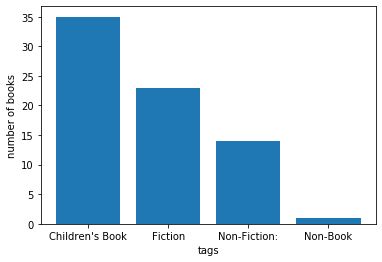

In [0]:
count_each_tag = (npo_book_df['Tag']).value_counts()
plt.figure()
plt.bar(count_each_tag.index,count_each_tag.values)
plt.xlabel('tags')
plt.ylabel('number of books')
plt.show()

2) Visualisation of data after cleaning: <br>
<br>


After cleaning, we are using box plot to show the comparison of prices before and after the discount.

In [0]:
data_df

,Title,Discount,Sold Out,Was Price(RM),Current Price(RM),Tag
0,charles dickens: a celebration of his life and...,-0.71,Out-of-Stock,118.0,118.0,non-fiction:
1,my busy books: teenage mutant ninja turtles,-0.71,None,87.0,24.9,children's book
2,my busy books: guarding of the galaxy,-0.71,None,87.0,24.9,children's book
3,my busy books: frozen fever,-0.71,None,87.0,24.9,children's book
4,my busy books: my little pony the movie,-0.71,None,87.0,24.9,children's book
...,...,...,...,...,...,...
68,great expectations: chiltern edition,-0.71,None,175.0,49.9,fiction
69,the 13th reality series (box set),-0.66,None,148.0,49.9,fiction
70,the divergent series boxed set (books 1-3),-0.65,None,143.8,49.9,fiction
71,j.k. rowling's wizarding world: movie magic - ...,-0.61,None,129.9,49.9,children's book


In [0]:
data_df = data_df.rename(columns = {"Was Price(RM)":"Before the Discount",
                                  "Current Price(RM)":"After the Discount"})

book_price = data_df[['Before the Discount','After the Discount']]
book_price

,Before the Discount,After the Discount
0,118.0,118.0
1,87.0,24.9
2,87.0,24.9
3,87.0,24.9
4,87.0,24.9
...,...,...
68,175.0,49.9
69,148.0,49.9
70,143.8,49.9
71,129.9,49.9


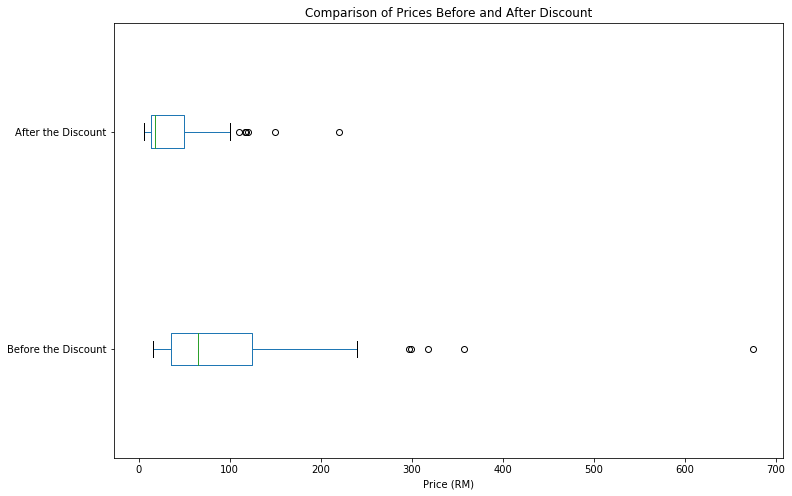

In [0]:
book_price.plot(kind='box', figsize=(12, 8), vert=False)

plt.title('Comparison of Prices Before and After Discount')
plt.xlabel('Price (RM)')

plt.show()

Using line plot to show a different visualisation.

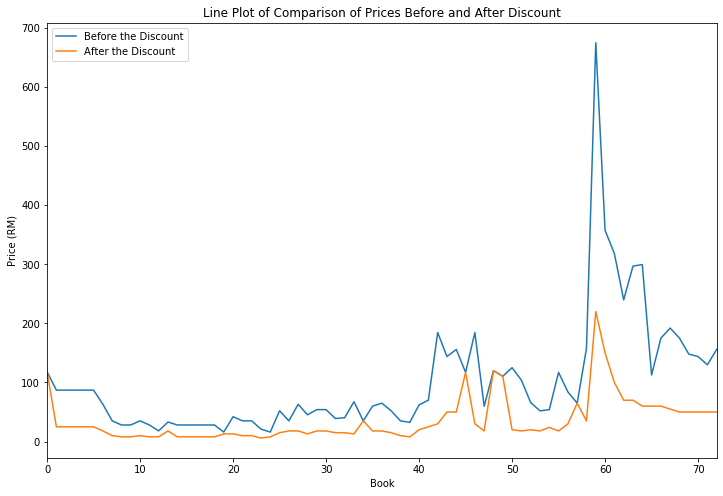

In [0]:
book_price.plot(kind='line', figsize=(12, 8))

plt.title('Line Plot of Comparison of Prices Before and After Discount')
plt.xlabel('Book')
plt.ylabel('Price (RM)')

plt.show()